# Оптимизирование маркетинговых затрат

У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года. Наша задача изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда клиент окупается. На основе этих данных порекомендовать маркетологам,  куда и сколько им стоит вкладывать денег.

###### Данное исследование разделим на несколько частей.

##### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

##### Часть 2. Подготовка данных:
* [1. Приведение данных к нужным типам, изменение названий столбцов.](#2-bullet)

##### Часть 3. Анализ данных:
* [1. Анализ продукта.](#3-bullet)
* [2. Анализ продаж.](#4-bullet)
* [3. Анализ маркетинга.](#5-bullet)

##### Часть 4. Выводы :
* [1. Общий вывод.](#6-bullet)


<a id='1-bullet'></a>

## Изучение общей информации о таблице.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [2]:
visit = pd.read_csv('/datasets/visits_log.csv')
visit.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
order = pd.read_csv('/datasets/orders_log.csv')
order.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
cost = pd.read_csv('/datasets/costs.csv')
cost.head(20)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [7]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### Вывод

Мы посмотрели три таблице, в них нет пропусков, но есть проблемы с типом данных.

<a id='2-bullet'></a>

## Предобработка данных

Для удобства переименуем названия столбцов в таблицах.

In [8]:
visit.columns=['device', 'end', 'source_id', 'start', 'uid']

In [9]:
order.columns=['buy', 'revenue', 'uid']

Теперь переведем определенные столбцы во временной тип.

In [10]:
visit['end']=pd.to_datetime(visit['end'])

In [11]:
visit['start']=pd.to_datetime(visit['start'])

In [12]:
order['buy']=pd.to_datetime(order['buy'])

In [13]:
cost['dt']=pd.to_datetime(cost['dt'])

Наше исследование ограничено по времени, поэтому удалим ненужную информацию.

In [14]:
order=order[order['buy']<='2018-06-01']

Удалим дубликаты, если они есть.

In [15]:
visit=visit.drop_duplicates()

In [16]:
cost=cost.drop_duplicates()


In [17]:
order=order.drop_duplicates()

Посмотрим на то, что у нас получилось.

In [18]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 3 columns):
buy        50414 non-null datetime64[ns]
revenue    50414 non-null float64
uid        50414 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


In [19]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 79.4 KB


In [20]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end          359400 non-null datetime64[ns]
source_id    359400 non-null int64
start        359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB


### Вывод

Теперь таблицы готовы для глубокого изучения.

## Анализ данных

<a id='3-bullet'></a>

### Анализ посещения сайта.


In [21]:

visit['session_month'] = visit['start'].dt.month
visit['session_week']  = visit['start'].dt.week
visit['session_date'] = visit['start'].dt.date

Давайте для начала посчитаем среднее количество уникальных посетителей в день, в неделю и в месяц. Далее найдем sticky factor, то есть посчитаем регулярность использования нашего приложения — то, как часто пользователи к нему обращаются. 

In [22]:
mau_total = visit.groupby('session_month').agg({'uid': 'nunique'}).mean()
dau_total = visit.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visit.groupby('session_week').agg({'uid': 'nunique'}).mean()

In [23]:
sticky_mau=dau_total/mau_total*100
sticky_wau=dau_total/wau_total*100
print(sticky_wau)
print(sticky_mau)

uid    15.587069
dtype: float64
uid    3.90897
dtype: float64


Мы посчитали "липкий фактор". Видим, что Sticky Factor для месяца равен 3-4% Это минимальное значение, которое может принимать данная метрика, и говорит оно о том, что пользователи не задерживаются в приложении, вероятно его удержание очень низкое и в нем отсутствует пользовательская база, которая необходима для того, чтобы генерировать доход приложения.
Sticky Factor для месяца чуть выше, но для такого приложения как Яндекс.Афиша это слишком низкий показатель.

In [24]:
visit['session_month'] = visit['start'].astype('datetime64[M]')
sessions_per_user_month = visit.groupby('session_month').agg({'uid': ['count','nunique']}).reset_index()

In [25]:
sessions_per_user_month.columns = ['session_month','n_sessions', 'n_users']
sessions_per_user_month['sessions_per_user'] = sessions_per_user_month['n_sessions'] / sessions_per_user_month['n_users']

In [26]:
sessions_per_user_month.sample()

,session_month,n_sessions,n_users,sessions_per_user
1,2017-07-01,17828,14183,1.256998


In [27]:
sessions_per_user_month['sessions_per_user'].agg({'min', 'max', 'mean', 'median'})

max       1.340641
mean      1.280889
median    1.281448
min       1.234202
Name: sessions_per_user, dtype: float64

Видим, что в месяц пользователи редко заходят  еще раз на сайт, но такие ситуации случаются, хотя не так часто. Давайте посмотрим на график для болей наглядности.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


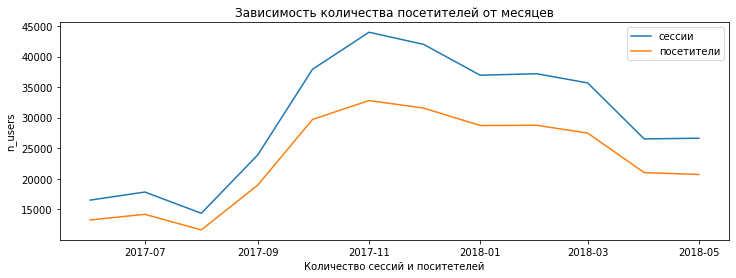

In [28]:
plt.figure(figsize=(12, 4))
sns.lineplot(x="session_month", y="n_sessions", data=sessions_per_user_month, label='сессии')
sns.lineplot(x="session_month", y="n_users", data=sessions_per_user_month, label='посетители')
plt.title("Зависимость количества посетителей от месяцев")
plt.xlabel('Количество сессий и поситетелей')
plt.legend()
plt.show()

Функция сессий полностью повторяют функцию посетителей, то есть количество повторных посещений пропорционально количеству посетителей.

Также видим четкий подъем посещений сайта начиная с сентября 2017 года. Такие неожиданные высокие показатели по сравнению с прошлым месяцем возможны из-за начала рекламной компании. Вероятно еще наслоился тот факт , что началась осень, большая часть людей приехала из отпусков, поэтому они готовы посещать мероприятия, такие как походы в кино, театр и т.д.

In [29]:
sessions_per_user = visit.groupby(['session_date']).agg({'uid': ['count','nunique']}).reset_index()

In [30]:
sessions_per_user.columns = ['session_date','n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

In [31]:
sessions_per_user.head()

,session_date,n_sessions,n_users,sessions_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024


In [32]:
sessions_per_user['sessions_per_user'].agg({'min', 'max', 'mean', 'median'})

max       1.217837
mean      1.082170
median    1.082488
min       1.000000
Name: sessions_per_user, dtype: float64

К сожалению, за день пользователи повторно не заходят.

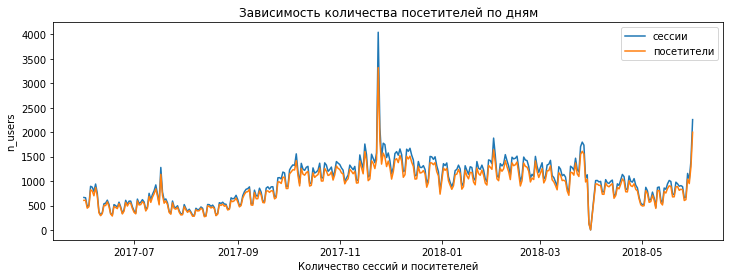

In [33]:
plt.figure(figsize=(12, 4))
sns.lineplot(x="session_date", y="n_sessions", data=sessions_per_user, label='сессии')
sns.lineplot(x="session_date", y="n_users", data=sessions_per_user, label='посетители')
plt.title("Зависимость количества посетителей по дням")
plt.xlabel('Количество сессий и поситетелей')
plt.legend()
plt.show()

Итак, на графике есть много закономерностей. Заменты постоянные локальные максимумы и минимумы на графике, эта цикличность существует из-за цикличности дней недели. А скачки связаны с праздниками, так как люди в это врями выделяют время на посещение раных заведений.

In [34]:
first_visit_date_by_customers = visit.groupby('uid')['start'].min()
first_visit_date_by_customers.name = 'first_visit_date'
visit = visit.join(first_visit_date_by_customers,on='uid')
visit['first_visit_month'] = visit['first_visit_date'].astype('datetime64[M]')
visit['visit_month'] = visit['start'].astype('datetime64[M]')


In [35]:
visit_pivot=visit.pivot_table(index='first_visit_month',
    columns='visit_month',
    values='uid',
    aggfunc='nunique')

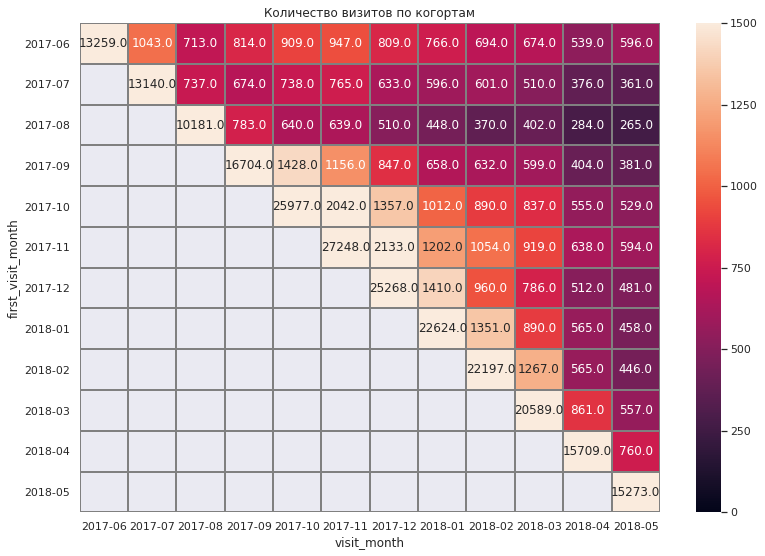

In [36]:
sns.set()
plt.figure(figsize=(13, 9))
ax = sns.heatmap(visit_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmin=0, vmax=1500, yticklabels=visit_pivot.index.strftime('%Y-%m'), xticklabels=visit_pivot.columns.strftime('%Y-%m'))
#ax.set_xticklabels(visit['visit_month'].dt.strftime('%d-%m-%Y'))
#ax.set_yticklabels(visit['first_visit_month'].dt.strftime('%d-%m-%Y'))
plt.title('Количество визитов по когортам')
plt.show()

Итак, давайте посмотрим на построенную таблицу. На таблице представлены когорты, выделенные по месяцам и их посещение по месяцам. 
Заметим, что количество посещений во второй месяц по когортам в 10 раз меньше чем в первый. Это говорит, что подавляющая часть людей не заходят на сайт в следующем месяце. После второго месяца количество посетителей долгое время держится примерно на том же уровне, только к конце года она значительно уменьшается.
Также, хочется сказать, что октябрьские-февральские когорты самые большие в отличие, от других когорт. Это можно объяснить временем года и главным праздником года( Новый год). 

In [37]:
visit['cohort_lifetime'] = visit['visit_month'] - visit['first_visit_month']
visit['cohort_lifetime'] = visit['cohort_lifetime'] / np.timedelta64(1,'M')
visit['cohort_lifetime'] = visit['cohort_lifetime'].round().astype('int')

In [38]:
cohorts = visit.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [39]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]

In [40]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [41]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')

In [42]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [43]:
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

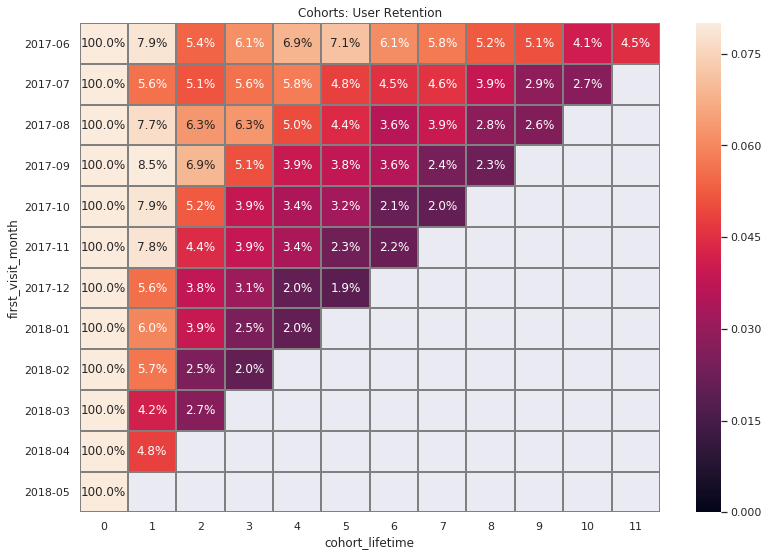

In [44]:
sns.set()
plt.figure(figsize=(13, 9))
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.08, yticklabels=retention_pivot.index.strftime('%Y-%m'))
#ax.set_yticklabels(cohorts['first_visit_month'].dt.strftime('%Y-%m'))
plt.title('Cohorts: User Retention')
plt.show()

Видим, RR не превосходит 10 процентов, более того почти во  всех когортах RR снижается до 2%. 

#### Продолжительность сессий.

In [45]:
visit['session_duration_sec'] = (visit['end'] - visit['start']).dt.seconds
print("Сессия", int(visit['session_duration_sec'].mean()))

Сессия 643


В среднем 10 минут, это хорошая цифра, но посмотрим на ситуацию более глубже.

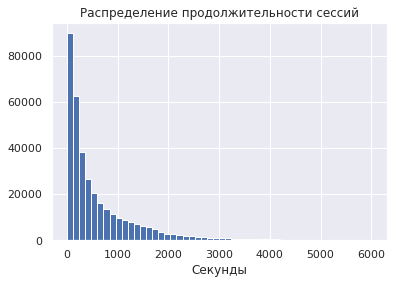

In [46]:
visit['session_duration_sec'].hist(bins=50, range=(0,6000))
plt.title("Распределение продолжительности сессий")
plt.xlabel('Секунды')
plt.show()

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, рассчитаем моду:

In [47]:
print(visit['session_duration_sec'].mode())

0    60
dtype: int64


То есть на сайте клиент находится около минуты. Это очень маленькое число, глубоко на сайт пользователь не смог бы зайти , поэтому проблема кроется в стартовой странице.

### Вывод

Показатели данного сайта довольно низкие: во-первых мы говорим о слабом удержании клиентов, большинство посетителей сайта не заходят на него еще раз. Только 2-9% клиентов возращаются на сайт, при чем такие низкие цифры удерживаются по всем когортам. Во-вторых,подавляющая часть клиентов не задерживаются на сайте долго. Эти показатели безусловно связаны, если человек зашел и сразу же вышел, значит первые впечатления о сайте были негативными, поэтому вероятность того, что человек зайдет на сайт еще раз понижается. Конечно, возможен вариант того, что посетитель зашел на сайт с постороннего сайта и ему осталось только оплатить, но и с такими ситуациями можно работать. Мы можем попытаться привлечь покупателей к другому продукту.

<a id='4-bullet'></a>

## Анализ продаж

### Посещения сайта и покупки

In [48]:
df = visit.merge(order, on='uid', how='left')

In [49]:
df.head()

,device,end,source_id,start,uid,session_month,session_week,session_date,first_visit_date,first_visit_month,visit_month,cohort_lifetime,session_duration_sec,buy,revenue
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01,0,1080,NaT,NaN
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01,0,1680,NaT,NaN
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01,0,0,NaT,NaN
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,2018-03-09 20:05:00,2018-03-01,2018-05-01,2,1440,2018-03-09 20:25:00,2.33
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27,2017-12-27 14:06:00,2017-12-01,2017-12-01,0,0,NaT,NaN


In [50]:
df.drop([ 'first_visit_month' ,'visit_month' ,'device', 'source_id', 'revenue', 'session_week', 'session_month', 'session_date', 'session_duration_sec', 'end'], axis='columns', inplace=True)

In [51]:
df=df.dropna()

In [52]:
df.sample(5)

,start,uid,first_visit_date,cohort_lifetime,buy
722773,2018-03-08 20:13:00,11434808042914137836,2017-08-26 16:24:00,7,2018-01-03 15:45:00
285088,2018-05-17 08:16:00,3963367130094376110,2017-06-01 18:07:00,11,2018-03-26 13:29:00
603009,2017-08-21 13:52:00,13888745432979765063,2017-06-05 11:22:00,2,2017-06-26 16:50:00
849102,2017-10-16 14:54:00,13888745432979765063,2017-06-05 11:22:00,4,2018-01-12 12:36:00
319090,2018-01-14 10:04:00,3263486045884611639,2017-06-01 08:51:00,7,2017-06-28 15:41:00


In [53]:
first_purchase = df.groupby(['uid'])['buy'].min()

In [54]:
first_purchase.name = 'first_purchase'
first_purchase = first_purchase.reset_index()
df = df.merge(first_purchase,on='uid', how='left')

Итак, мы создали большую таблицу, где собрана информация о начале использования сайта и времени первой покупки по каждому пользователю, и дополнительная информация о времени всех покупок и начале всех сессий.
Создадим удобную для нас таблицу, где будет только информация о начале использования сайта и времени первой покупки по каждому пользователю.

In [55]:
df=df[(df['buy']==df['first_purchase'])&(df['first_visit_date']==df['start'])]

In [56]:
df.sample(10)

,start,uid,first_visit_date,cohort_lifetime,buy,first_purchase
697077,2017-08-07 16:08:00,12235294284399131672,2017-08-07 16:08:00,0,2017-08-07 16:11:00,2017-08-07 16:11:00
761767,2017-06-06 22:51:00,17971145352859089550,2017-06-06 22:51:00,0,2017-06-06 22:51:00,2017-06-06 22:51:00
454269,2018-03-15 14:44:00,17917133228938046512,2018-03-15 14:44:00,0,2018-03-15 14:45:00,2018-03-15 14:45:00
126319,2017-07-20 14:10:00,6417306293244984694,2017-07-20 14:10:00,0,2017-07-20 14:15:00,2017-07-20 14:15:00
99663,2017-06-08 12:00:00,5490179166841612598,2017-06-08 12:00:00,0,2018-02-12 16:27:00,2018-02-12 16:27:00
368917,2018-01-21 21:11:00,8854403324174669358,2018-01-21 21:11:00,0,2018-01-21 21:24:00,2018-01-21 21:24:00
652827,2017-12-02 10:45:00,13799079401831985728,2017-12-02 10:45:00,0,2017-12-02 10:48:00,2017-12-02 10:48:00
491668,2018-01-20 13:59:00,14084718188311069458,2018-01-20 13:59:00,0,2018-01-25 18:30:00,2018-01-25 18:30:00
185729,2017-11-09 20:49:00,13360353057735045922,2017-11-09 20:49:00,0,2017-11-09 20:55:00,2017-11-09 20:55:00
287274,2017-12-12 14:37:00,16158631390821401186,2017-12-12 14:37:00,0,2017-12-12 14:40:00,2017-12-12 14:40:00


In [57]:
df['difference']=(df['first_purchase'] - df['start']).dt.days

Мы нашли время между первым входом на сайт и первой покупкой. Посмотрим на его распределение.

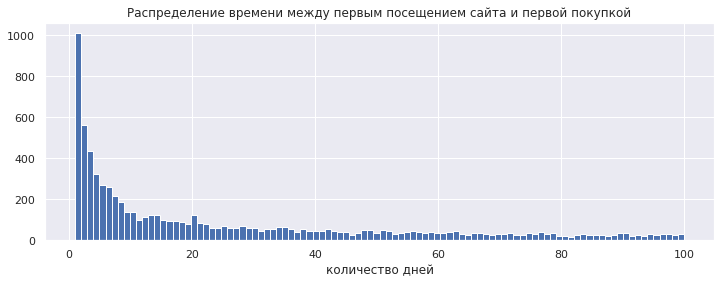

In [58]:
plt.figure(figsize=(12, 4))
df['difference'].hist(bins=100, range=(1, 100))
plt.title("Распределение времени между первым посещением сайта и первой покупкой")
plt.xlabel('количество дней')
plt.show()

Итак, привалирующая часть людей покупает что-то на сайте в течение 24 часов. Более детальный анализ для покупки в этот же день показан внизу. Большая часть остальных покупателей оплатили заказ 1-5 дней после первого входа на сайт.  

In [59]:
df_hours=df[df['difference']==0]

In [60]:
df_hours['difference']=((df_hours['first_purchase'] - df_hours['start']).dt.seconds)/60

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


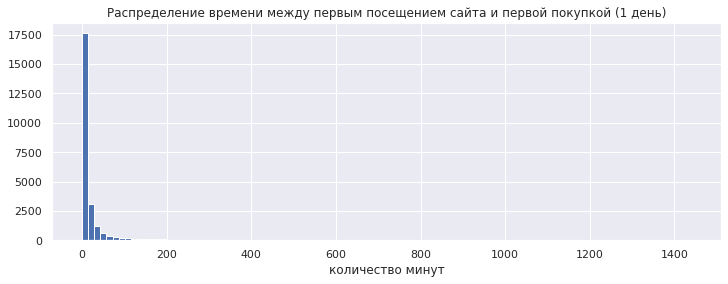

In [61]:
plt.figure(figsize=(12, 4))
df_hours['difference'].hist(bins=100)
plt.title("Распределение времени между первым посещением сайта и первой покупкой (1 день)")
plt.xlabel('количество минут')
plt.show()

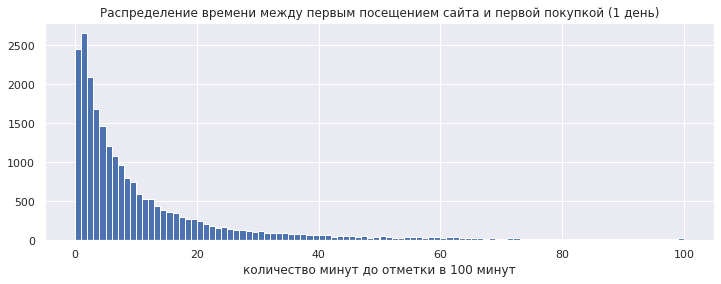

In [62]:
plt.figure(figsize=(12, 4))
df_hours['difference'].hist(bins=100, range=(0, 100))
plt.title("Распределение времени между первым посещением сайта и первой покупкой (1 день)")
plt.xlabel('количество минут до отметки в 100 минут')
plt.show()

Итак, посмотрев на три таблицы распределений, мы заметили некоторые закономерности:

1) Большая часть людей покупает товар в первые 20 минут.
2) Также мы заметили странные значения в нуле, то есть часть людей в ту же минуту покупают билет, такое возможно если человек перешел на сайт с другого сайта(реклама).

### Количество покупок

In [63]:
order['buy_month'] = order['buy'].astype('datetime64[M]')
order['buy_date'] = order['buy'].dt.date

In [64]:
order.sample(5)

,buy,revenue,uid,buy_month,buy_date
11679,2017-10-08 21:24:00,1.53,9849308391524317925,2017-10-01,2017-10-08
30779,2018-01-24 11:07:00,10.69,10029068528085152222,2018-01-01,2018-01-24
17854,2017-11-16 13:32:00,0.92,6208605112356972210,2017-11-01,2017-11-16
3437,2017-07-15 11:13:00,0.18,10437786737823784375,2017-07-01,2017-07-15
23601,2017-12-12 15:37:00,3.67,534161944313534235,2017-12-01,2017-12-12


In [65]:
buys_per_user_month = order.groupby('buy_month').agg({'uid': ['count','nunique']}).reset_index()

In [66]:
buys_per_user_month.columns = ['buy_month','n_buys', 'n_users']
buys_per_user_month['buys_per_user'] = buys_per_user_month['n_buys'] / buys_per_user_month['n_users']

In [67]:
buys_per_user_month

,buy_month,n_buys,n_users,buys_per_user
0,2017-06-01,2354,2023,1.163618
1,2017-07-01,2363,1984,1.191028
2,2017-08-01,1807,1472,1.227582
3,2017-09-01,3387,2750,1.231636
4,2017-10-01,5679,4675,1.214759
5,2017-11-01,5659,4547,1.244557
6,2017-12-01,6218,4942,1.258195
7,2018-01-01,4721,3898,1.211134
8,2018-02-01,5281,4258,1.240254
9,2018-03-01,5326,4181,1.273858


Давайте посмотрим на таблицу. Мы нашли сколько покупок совершаются в месяц. Интересно, что значение переменной "количество покупок на человека" близка к значению "количество посещений сайта" из таблицы выше. Это говорит, что удержание покупателя у сайта получается лучше, чем просто посетителя.

In [68]:
buys_per_user = order.groupby('buy_date').agg({'uid': ['count','nunique']}).reset_index()
buys_per_user.columns = ['buy_date','n_buys', 'n_users']
buys_per_user['buys_per_user'] = buys_per_user['n_buys'] / buys_per_user['n_users']

In [69]:
buys_per_user.sample(3)

,buy_date,n_buys,n_users,buys_per_user
55,2017-07-26,59,54,1.092593
317,2018-04-16,120,114,1.052632
307,2018-04-06,108,104,1.038462


Такие же махинации мы проделали с распределением покупок по неделям и дням. Теперь мы знаем количество покупок каждый месяц, неделю и день.

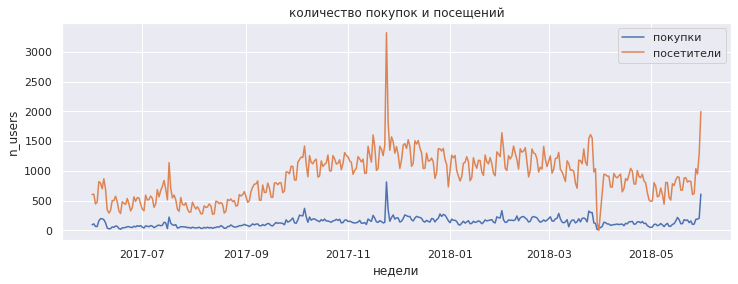

In [70]:
plt.figure(figsize=(12, 4))
sns.lineplot(x="buy_date", y="n_buys", data=buys_per_user, label='покупки')
sns.lineplot(x="session_date", y="n_users", data=sessions_per_user, label='посетители')
plt.title("количество покупок и посещений")
plt.xlabel('недели')
plt.legend()
plt.show()

На всякий случай, посмотрим на график. Заметим, что синия функция повторяет желтую, но у синий более сглажены скочки, то есть необычное количество посещений не сильно влияет на покупки. Также видим скачки на графиках, вероятнее всего это либо рекламные компании,которые искусственно повлияли на количество посетителей и покупателей, либо праздники.

In [71]:
first_order_date_by_customers = order.groupby('uid')['buy'].min()
first_order_date_by_customers.name = 'first_order_date'
data = order.join(first_order_date_by_customers,on='uid')
data['first_order_month'] = data['first_order_date'].astype('datetime64[M]')
data['order_month'] = data['buy'].astype('datetime64[M]')
#data['first_order_month'].dt.strftime('%d.%m.%Y')

In [72]:
order_pivot=data.pivot_table(index='first_order_month',
    columns='order_month',
    values='uid',
    aggfunc='nunique')

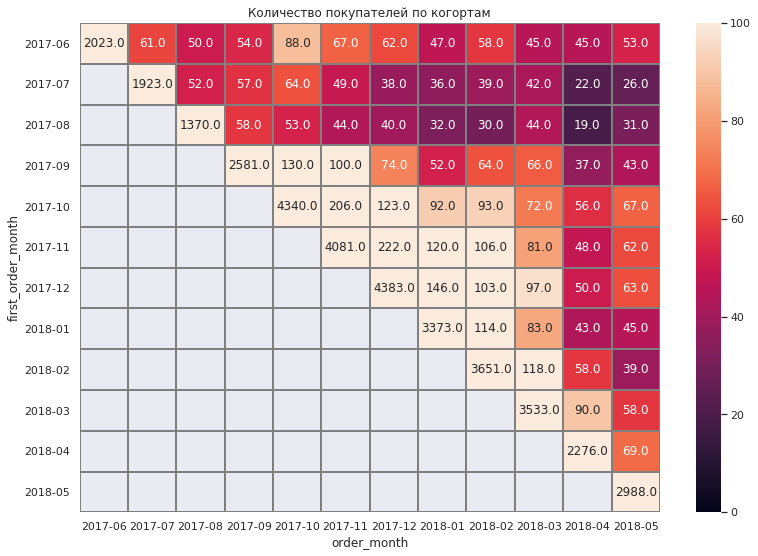

In [73]:
sns.set()
plt.figure(figsize=(13, 9))
ax = sns.heatmap(order_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmin=0, vmax=100,yticklabels=order_pivot.index.strftime('%Y-%m'), xticklabels=order_pivot.columns.strftime('%Y-%m') )
#ax.set_xticklabels(data['order_month'].dt.strftime('%d-%m-%Y'))
#ax.set_yticklabels(data['first_order_month'].dt.strftime('%d-%m-%Y'))
plt.title('Количество покупателей по когортам')
plt.show()

Главная закономерность этой тепловой таблицы в том, что количество покупателей в первый месяц в разы больше, чем у той же когорты в следующий месяц, однако после такого резкого спада мы видим очень медленное уменьшение количества покупателей каждый месяц, а  у первой когорты такого уменьшения вообще нет. Из этого можно сделать вывод, что есть небольшая часть людей, которым понравился наш продукт. Также стоит заметить, что как и в когортном анализе для посетителей, так и для покупок выделяются когрты октябрь-февраль с самым большим первым показателем.

### Средний чек

Мы нашли средний чек покупателей.

Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени:

In [74]:
orders_grouped_by_cohorts = data.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
#orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y')
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')

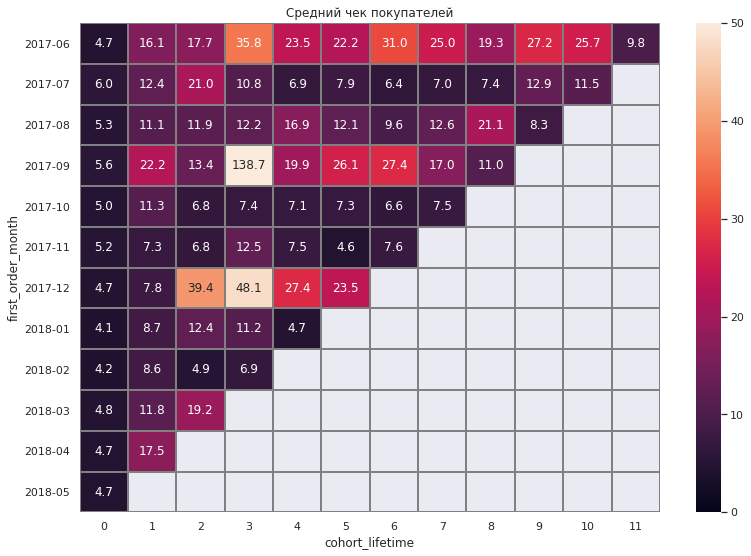

In [75]:
sns.set()
plt.figure(figsize=(13, 9))
ax = sns.heatmap(revenue_per_user_pivot, annot=True, fmt=
                 '.1f', linewidths=1, linecolor='gray', vmin=0, vmax=50, yticklabels=revenue_per_user_pivot.index.strftime('%Y-%m'))
plt.title('Средний чек покупателей')
plt.show()

Посмотрим на таблицу. Интересно, что средний чек в первый месяц одинаковый по всем когортам, а в следующих месяцах начинает возрастать. Конечно мы не видим монотонного подъема цены среднего чека, но тот факт, что средний чек в первый месяц ниже, чем в другие месяцы, говорит, что постоянные покупатели готовы тратить больше и доверяют сайту.  

<a id='5-bullet'></a>

## Анализ маркетинга

Давайте посмотрим на наши доходы и расходы:

In [76]:
print("расходы на рекламу:",int(cost['costs'].sum()))

расходы на рекламу: 329131


In [77]:
print( 'доходы от покупок:', int(order['revenue'].sum()))

доходы от покупок: 252053


Затраты на рекламу превысили наши доходы. Давайте рассмотрим ситуацию более детально.

### LTV, САС и ROMI по когортам

In [78]:
order['order_month'] = order['buy'].astype('datetime64[M]')
first_orders = order.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']


In [79]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']


In [80]:
orders_first_month = pd.merge(order,first_orders, on='uid')

In [81]:
cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [82]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [83]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [84]:
report['ltv'] = report['gp'] / report['n_buyers']
result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')
final_result = result.cumsum(axis=1)

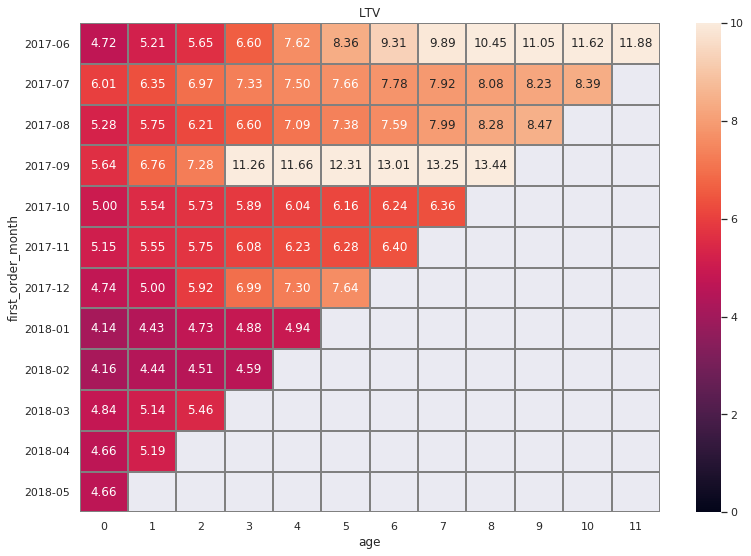

In [85]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(final_result, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=0, vmax=10, yticklabels=final_result.index.strftime('%Y-%m'))
plt.show()

Итак, мы посчитали LTV. Видим , что лучшие показатели у первой и четвертой когорты. Показатели более молодых когорт чуть хуже, чем у старых когорт в тот же период.

In [86]:
cost['month'] = cost['dt'].astype('datetime64[M]')

monthly_costs = cost.groupby('month')['costs'].sum()
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']


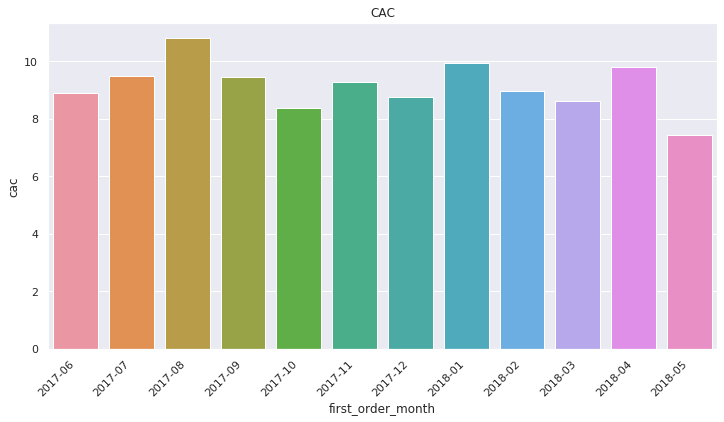

In [87]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "first_order_month", y = "cac", data = report_new, ci = None, ax=ax)
plt.title('CAC')
x_dates = report_new['first_order_month'].dt.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.show()

Посмотрим на распределение САС по месяцам. Видим, что стоимость привлечения клиентов разнится от месяца к месяцу.

In [88]:
monthly_costs

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

Но при этом четкий рост затрат до 2018 года и медленный спад до конца изучаемого периода. 

In [89]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')
final_output = output.cumsum(axis=1)

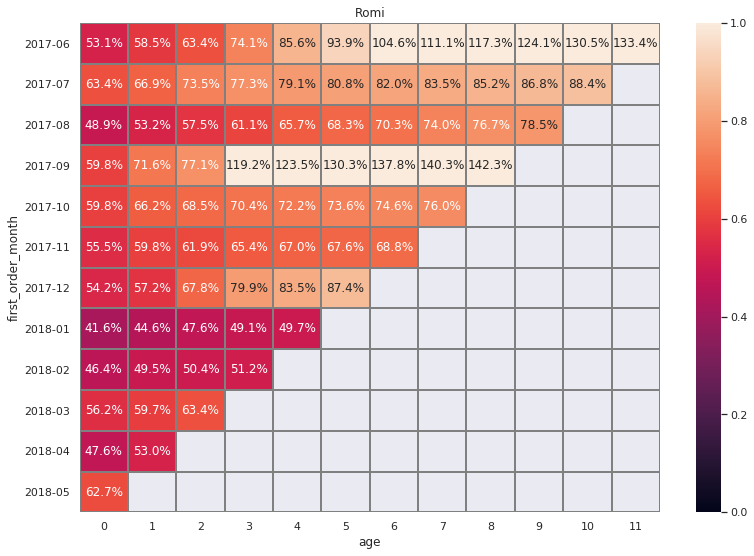

In [90]:
plt.figure(figsize=(13, 9))
plt.title('Romi')
sns.heatmap(final_output, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=1, yticklabels=final_output.index.strftime('%Y-%m'))
plt.show()

Мы посчитали САС и ROI. Мы поделим когорты на два , так как сравнивать старые когорты с очень молодыми по последним показателям будет опроменчиво. Также как и для предыдущей таблицы отличные показатели у первой и четвертой когорты. У остальных четырех когорт показатели хуже, но стабильны между собой. Если говорить о молодых когортах, то их показатели все равно хуже старых когорт в этот же период. Однако стоит заметить хорошие цифры у 7 когорты.

### Вывод

Таким образом, из 12 когорт 2 окупились точно,возможно, что в будущем окупятся еще 2-3 . Но даже при наилучших условиях эти показатели слишком низкие.

### LTV, САС и ROMI по источникам

In [91]:
df = visit.merge(order, on='uid', how='left')

In [92]:
df.drop([ 'first_visit_month' ,'visit_month' , 'start', 'first_visit_date', 'session_week', 'session_month', 'session_date', 'session_duration_sec', 'end', 'buy_month', 'buy_date'], axis='columns', inplace=True)

In [93]:
df=df.dropna()

In [94]:
user_ltv = (
    df.groupby(['source_id', 'order_month']).agg({'device': 'count', 'revenue':'sum'}).rename(columns={'device': 'users_n'}))

In [95]:
user_ltv['ltv']=user_ltv['revenue']/user_ltv['users_n']

In [96]:
ltv_pivot=user_ltv.pivot_table(
    index='order_month', 
    columns='source_id', 
    values='ltv')


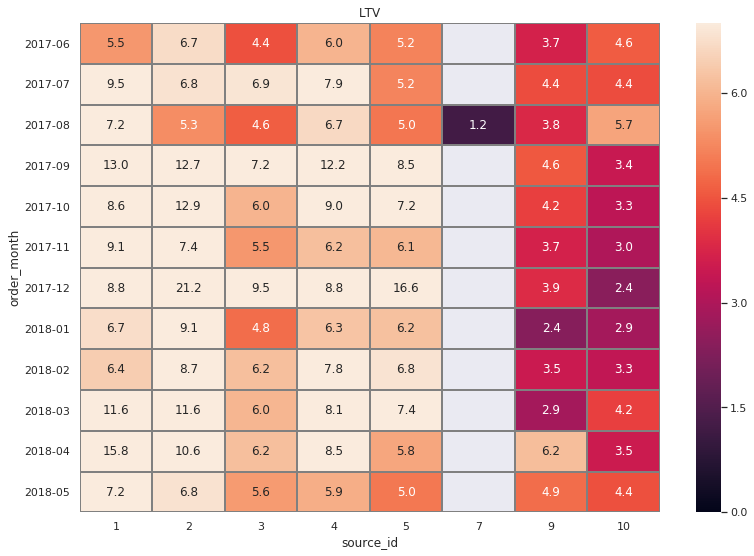

In [97]:
sns.set()
plt.figure(figsize=(13, 9))
sns.heatmap(ltv_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmin=0, vmax=7,  yticklabels=ltv_pivot.index.strftime('%Y-%m'))

plt.title('LTV')
plt.show()

In [98]:
user_ltv=user_ltv.reset_index().rename(columns={'order_month': 'acquisition_month'}).set_index(['source_id', 'acquisition_month'])

In [99]:
users = (visit.sort_values(by = ['uid', 'start']).groupby('uid')
               .agg({'start' : 'first','source_id': 'first', 'device': 'first'}))

In [100]:
cost=cost.rename(columns={'month': 'acquisition_month'}).set_index(['source_id', 'acquisition_month'])

In [101]:
users['acquisition_date']=users['start'].dt.date
users['acquisition_month']=users['start'].astype('datetime64[M]')

In [102]:
users=users.reset_index().set_index(['source_id', 'acquisition_month']).join(cost, how='left')

In [103]:
user_cost = (users.groupby(['source_id', 'acquisition_month']).agg({'device': 'count', 'costs':'sum'}).rename(columns={'device': 'users'}))

In [104]:
user_cost['cac']=user_cost['costs']/user_cost['users']


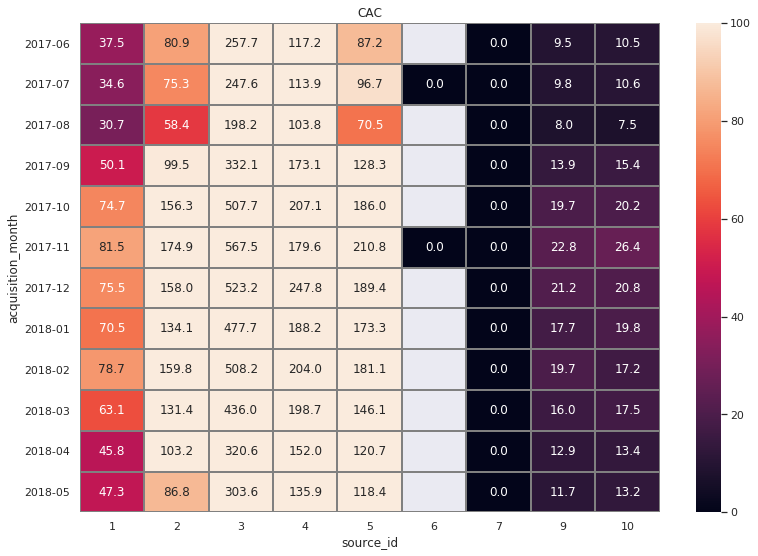

In [105]:
cac_pivot=user_cost.pivot_table(
    index='acquisition_month', 
    columns='source_id', 
    values='cac')
sns.set()
plt.figure(figsize=(13, 9))
sns.heatmap(cac_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmin=0, vmax=100,  yticklabels=cac_pivot.index.strftime('%Y-%m'))

plt.title('CAC')
plt.show()

Видим, что затраты на рекламу на одного покупателя в 9-10 источники самые низкие.Также не высокие цифры у первого источника. Стоимость привлечения клиентов из оставшихся источников очень высокая.

In [106]:
user=user_ltv.merge(user_cost, on=['source_id', 'acquisition_month'] , how='left')

In [107]:
user['romi'] = user['ltv'] / user['cac']
output = user.pivot_table(
    index='acquisition_month', 
    columns='source_id', 
    values='romi', 
    aggfunc='mean')
output=output.cumsum()

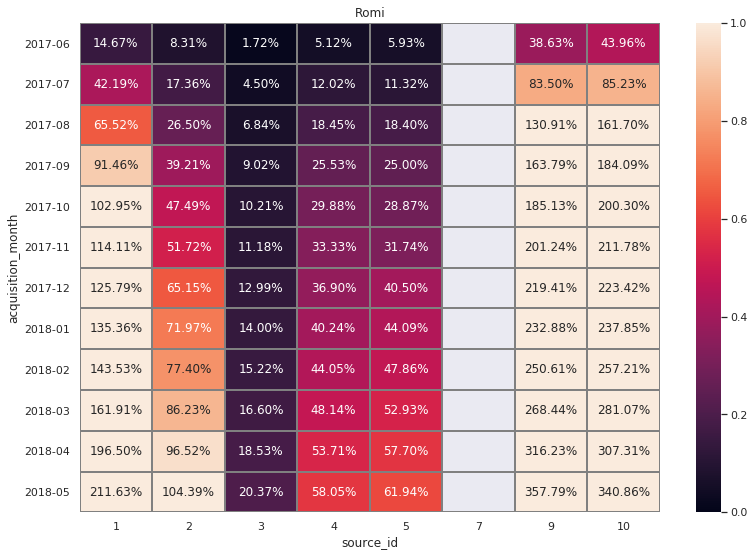

In [108]:
plt.figure(figsize=(13, 9))
plt.title('Romi')
sns.heatmap(output, annot=True, fmt='.2%', linewidths=1, linecolor='gray', vmin=0, vmax=1,  yticklabels=output.index.strftime('%Y-%m'))
plt.show()

### Вывод:

Довольно положительная таблица у нас получилась. 4 источника окупились. Особенно хорошо сработали источники рекламы 9 и 10. 

<a id='6-bullet'></a>

## Общий вывод:

Обобщая вышеизложенные доводы, мы пришли к выводу: показатель удерживания клиентов на сайте очень низкий, большая часть людей не приходят на сайт снова, причем такая закономерность прослеживается на всем промежутке времени. Далее мы заметили, что удерживать клиентов, которые купили продукт,у нас получается лучше, чем просто посетителей. Это говорит нам о том, что у клиентов плохое первое впечатление о сайте, поэтому они не приходят снова, а продукт им нравится, поэтому показатели у покупателей выше, чем у посетителей, поэтому мы считаем, что нужно поработать над дизайном сайта  и его удобством для юзеров. 
Что касается рекламы, то коэффициент рентабильности инвестиций низкий.Многие когорты не окупились.Мы считаем, что нужно более аккуратно подходить к выбору рекламы и в данный момент вкладываться только в эффективную. Самые эффективные источники под номерами 9 и 10. Мы считаем, что стоит вкладывать только в них.